## Load the data and cleaning


In [12]:
#load libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
#read data
#df = pd.read_csv("US_Accidents_March23_sampled_500k.csv")
df = pd.read_csv("US_Accidents_March23.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [41]:
#look at the columns in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [44]:

#convert time variable to date time
df['Start_Time'] = pd.to_datetime(df.Start_Time)
df['End_Time'] = pd.to_datetime(df.End_Time)

## Create year for which data was collect
df['Year_coll'] = df['Start_Time'].dt.year

### Road Accidents by Cities in the U.S

In [45]:
#creating a df by grouping by cities and the count of accidents
df_city = pd.DataFrame(df['City'].value_counts()).reset_index()
df_city.head()

,index,City
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939


In [46]:
#rename the columns well for better intuition
df_city = df_city.rename(columns={'index':'City', 'City':'No of Accidents'})
df_city

,City,No of Accidents
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
...,...,...
13673,Benkelman,1
13674,Old Appleton,1
13675,Wildrose,1
13676,Mc Nabb,1


In [47]:
#look at the number of cities in the df
len(df_city.City.unique())


13678

In [82]:
#average accident in the U.S
df_city["No of Accidents"].mean()

565.0051908173709

In [48]:
#because the cities are much then we look at the top 10 cities with accidents for better visualization
df_city_10 = pd.DataFrame(df_city.head(10))
df_city_10


,City,No of Accidents
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
5,Orlando,109733
6,Austin,97359
7,Raleigh,86079
8,Nashville,72930
9,Baton Rouge,71588


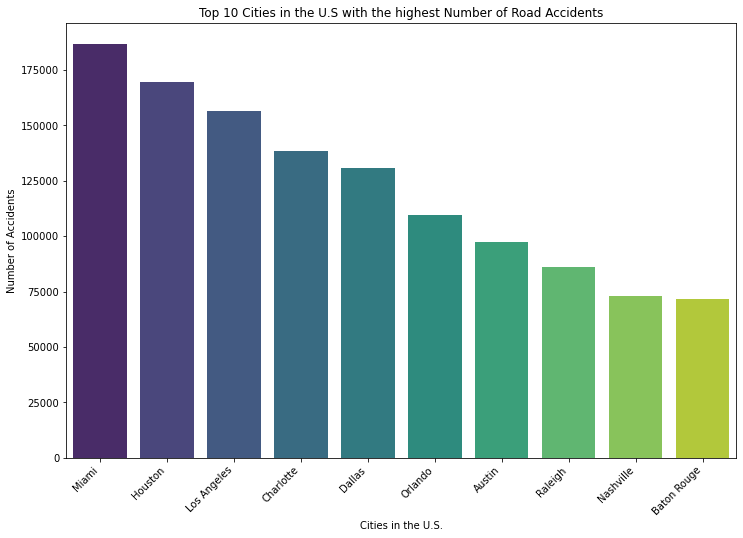

In [49]:
# Top 10 Cities in the U.S with the highest Number of Road Accidents

plt.figure(figsize=(12, 8))
sns.barplot(x=df_city_10.City, y=df_city_10["No of Accidents"], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cities in the U.S with the highest Number of Road Accidents')
plt.xlabel('Cities in the U.S.')
plt.ylabel('Number of Accidents')
plt.show()

### Road Accidents by Street

In [50]:
#creating a df by grouping by street and the count of accidents
df_street = pd.DataFrame(df['Street'].value_counts()).reset_index()
df_street.head()

,index,Street
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725


In [51]:
#rename the columns well for better intuition
df_street = df_street.rename(columns={'index':'Street', 'Street':'No of Accidents'})
df_street.head()

,Street,No of Accidents
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725


In [52]:
#look at the number of cities in the df
len(df_street.Street.unique())

336306

In [53]:
#because the street are much then we look at the top 10 street with accidents for better visualization
df_street_10 = pd.DataFrame(df_street.head(10))
df_street_10

,Street,No of Accidents
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
5,I-5 S,51781
6,I-80 W,39662
7,I-80 E,36113
8,I-405 N,32364
9,I-75 N,28166


Text(0, 0.5, 'Number of Accidents')

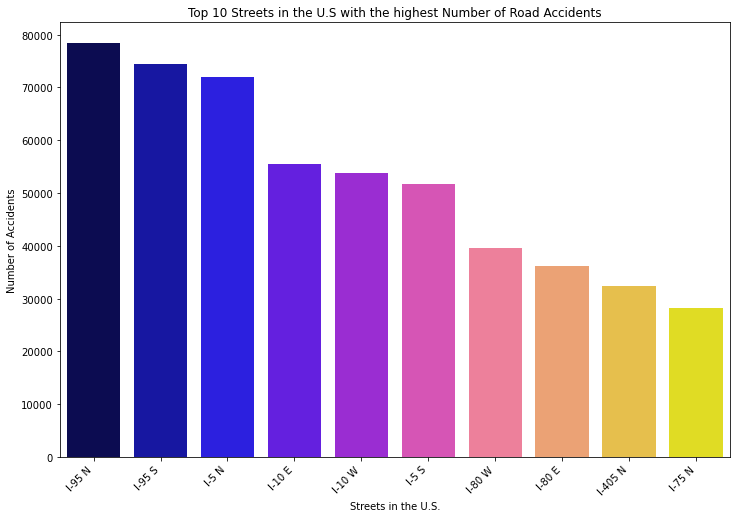

In [54]:
#gnuplot2
# Top 10 street in the U.S with the highest Number of Road Accidents

plt.figure(figsize=(12, 8))
sns.barplot(x=df_street_10.Street, y=df_street_10["No of Accidents"], palette='gnuplot2')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Streets in the U.S with the highest Number of Road Accidents')
plt.xlabel('Streets in the U.S.')
plt.ylabel('Number of Accidents')
#plt.show()

In [55]:
df.State.unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

### Trend Analysis of Accidents

In [56]:
df_year = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index()
df_year.head()

,index,Start_Time
0,2022,1762452
1,2021,1563753
2,2020,1178913
3,2019,954303
4,2018,893426


In [57]:
df_year = df_year.sort_values(by='index', ascending=True)
df_year


,index,Start_Time
6,2016,410821
5,2017,718093
4,2018,893426
3,2019,954303
2,2020,1178913
1,2021,1563753
0,2022,1762452
7,2023,246633


In [58]:
df_year['Start_Time'].mean()

966049.25

In [70]:
#rename the columns well for better intuition
df_year = df_year.rename(columns={'index':'Year', 'Start_Time':'No of Accidents'})
df_year.head()

,Year,No of Accidents
6,2016,410821
5,2017,718093
4,2018,893426
3,2019,954303
2,2020,1178913


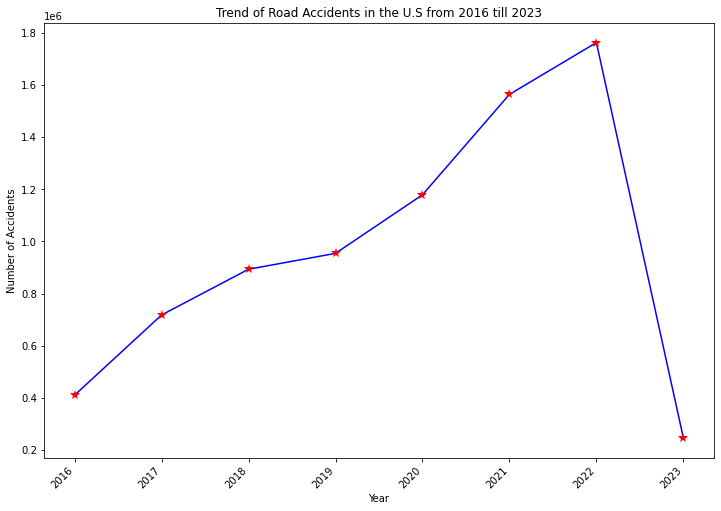

In [30]:
# Trend of accidents in the U.S from 2016 till 2023

plt.figure(figsize=(12, 8))
sns.lineplot(x=df_year['Year'], y=df_year["No of Accidents"], color='blue', marker='*', markersize=10, markerfacecolor='red', markeredgewidth=0)
plt.xticks(rotation=45, ha='right')
plt.title('Trend of Road Accidents in the U.S from 2016 till 2023')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


### Weather and Accident

In [59]:
#create a df for the weather
df_weather = pd.DataFrame(df.Weather_Condition.value_counts().head(5)).reset_index()
df_weather

,index,Weather_Condition
0,Fair,2560802
1,Mostly Cloudy,1016195
2,Cloudy,817082
3,Clear,808743
4,Partly Cloudy,698972


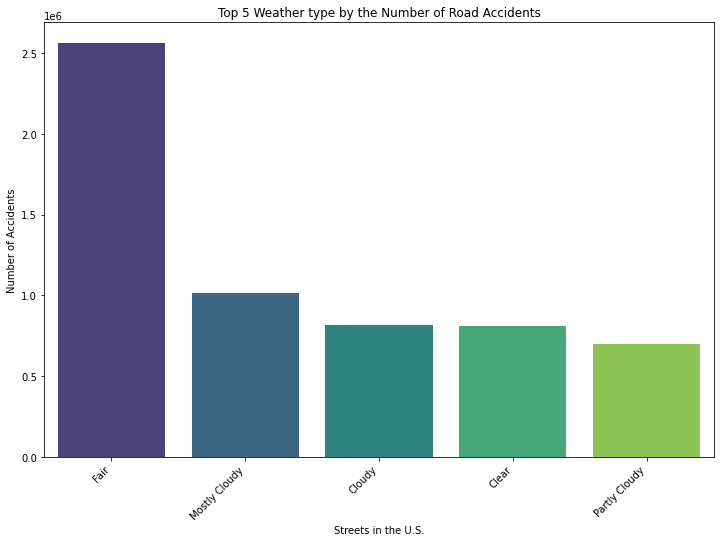

In [60]:
#plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=df_weather["index"], y=df_weather["Weather_Condition"], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Weather type by the Number of Road Accidents')
plt.xlabel('Streets in the U.S.')
plt.ylabel('Number of Accidents')
plt.show()

### Severity of Accidents

In [95]:
#severity is between number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 
#4 indicates a significant impact on traffic (i.e., long delay). 
df.Severity.unique()

array([3, 2, 1, 4])

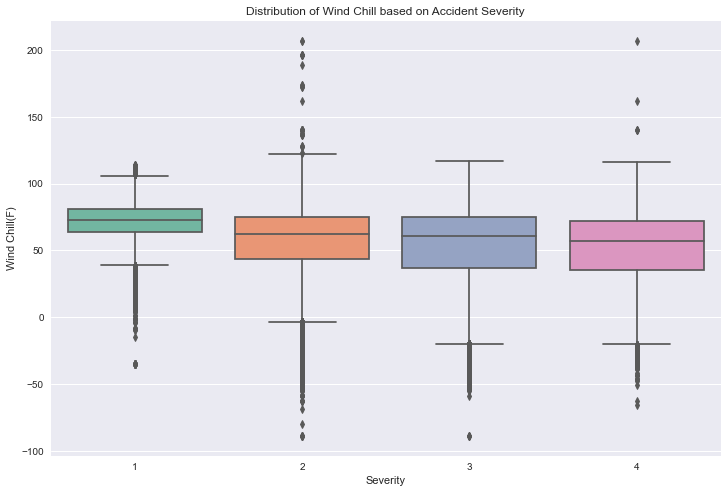

In [96]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="Severity", y="Wind_Chill(F)", palette="Set2")
plt.ylabel("Wind Chill(F)")
plt.xlabel('Severity')
plt.title('Distribution of Wind Chill based on Accident Severity')
plt.show()

In [97]:
df['Wind_Chill(F)'].mean()

58.25104839532788

### Mapping Number of Accidents by State

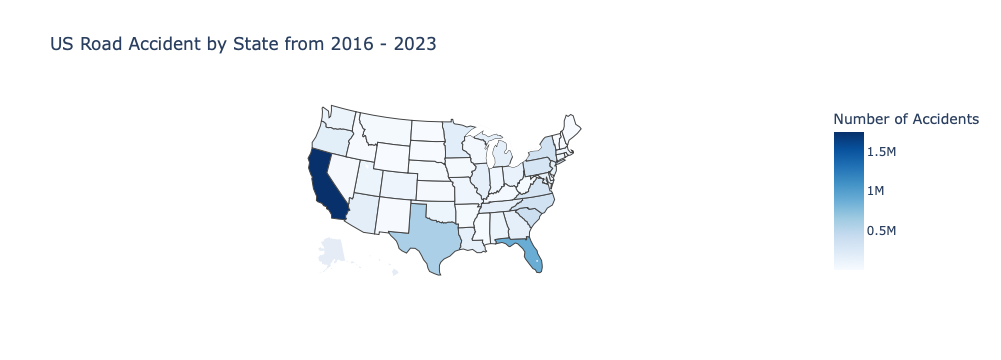

In [85]:
import plotly.graph_objects as go

state_accid = pd.value_counts(df['State'])

fig = go.Figure(data=go.Choropleth(
    locations=state_accid.index,
    z = state_accid.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = "Number of Accidents",
))

fig.update_layout(
    title_text = 'US Road Accident by State from 2016 - 2023',
    geo_scope='usa',
)

fig.show()



### Mapping average severity of acident by state

In [87]:


import folium
import pandas as pd

# Set the style to use for plots
plt.style.use("seaborn")

#create a US state map
my_map = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"


# Initialize the map
m = folium.Map(location=[37, -102], zoom_start=4)

# Add the color for the chloropleth
folium.Choropleth(
    geo_data=my_map,
    name='choropleth',
    data=df,
    columns=['State', 'Severity'],
    key_on='feature.id',
    #fill_color='YlGn',
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name='Accident Severity '
).add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)



m.save('us-severity.html')
m

### Running Correlation on variables

In [66]:
#creating a sub category of numerical variables
df_num = df.select_dtypes(include=['int64','float64'])
df_num

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year_coll
0,3,39.865147,-84.058723,NaN,NaN,0.010,36.9,NaN,91.0,29.68,10.0,NaN,0.02,2016
1,2,39.928059,-82.831184,NaN,NaN,0.010,37.9,NaN,100.0,29.65,10.0,NaN,0.00,2016
2,2,39.063148,-84.032608,NaN,NaN,0.010,36.0,33.3,100.0,29.67,10.0,3.5,NaN,2016
3,3,39.747753,-84.205582,NaN,NaN,0.010,35.1,31.0,96.0,29.64,9.0,4.6,NaN,2016
4,2,39.627781,-84.188354,NaN,NaN,0.010,36.0,33.3,89.0,29.65,6.0,3.5,NaN,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2,34.002480,-117.379360,33.99888,-117.37094,0.543,86.0,86.0,40.0,28.92,10.0,13.0,0.00,2019
7728390,2,32.766960,-117.148060,32.76555,-117.15363,0.338,70.0,70.0,73.0,29.39,10.0,6.0,0.00,2019
7728391,2,33.775450,-117.847790,33.77740,-117.85727,0.561,73.0,73.0,64.0,29.74,10.0,10.0,0.00,2019
7728392,2,33.992460,-118.403020,33.98311,-118.39565,0.772,71.0,71.0,81.0,29.62,10.0,8.0,0.00,2019


<AxesSubplot:>

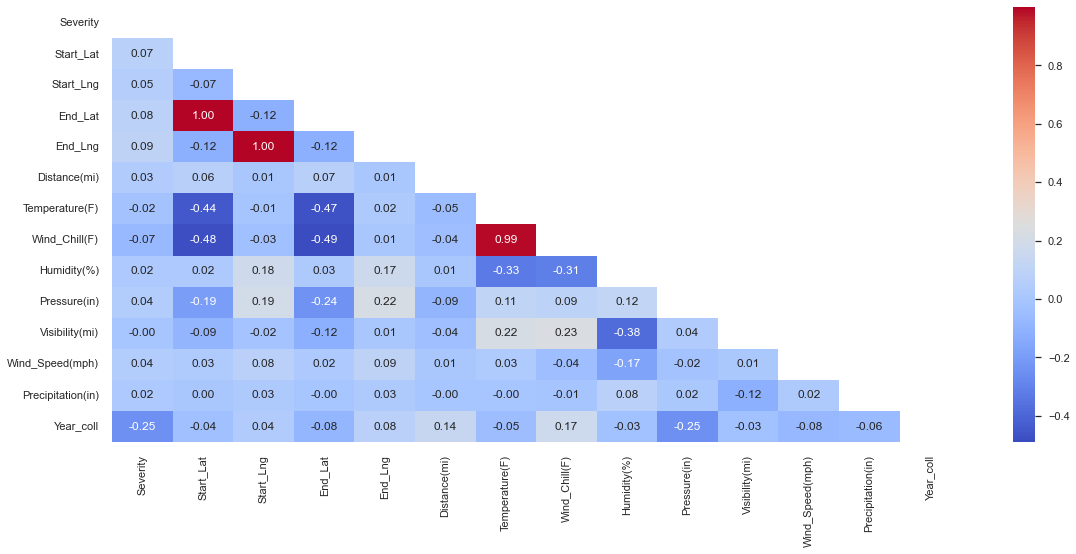

In [67]:
#correlation plot

plt.figure(figsize=(19, 8))
sns.set(style="white") 
mask = np.triu(df_num.corr()) 
sns.heatmap(data=df_num.corr(), annot=True, fmt=".2f", cmap='coolwarm', mask=mask)

### Linear Regression

In [71]:
# relationship between the year and no of accident
import numpy as np
from scipy import stats
df_year

,Year,No of Accidents
6,2016,410821
5,2017,718093
4,2018,893426
3,2019,954303
2,2020,1178913
1,2021,1563753
0,2022,1762452
7,2023,246633


In [72]:
results =stats.linregress(x=df_year['Year'], y= df_year['No of Accidents'])
results

LinregressResult(slope=75096.07142857143, intercept=-150690467.0, rvalue=0.3503593979075984, pvalue=0.3948554435472919, stderr=81957.57261111806, intercept_stderr=165513424.41875893)

In [73]:
#The predicted number of accidents by 2030
#y = m *x +b 
y = results.slope * 2030 + results.intercept
y
print('The predicted number of Accident by 2030 will', y)

The predicted number of Accident by 2030 will 1754558.0


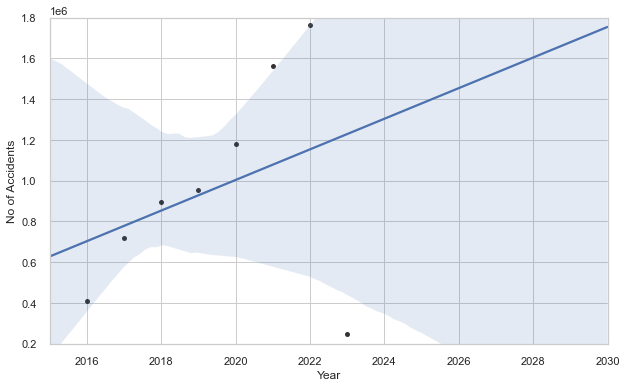

In [74]:
#Plotting the regression line with seaborn 

fig =plt.figure(figsize =(10,6))

sns.set_style('whitegrid')
plt.xlim(2015, 2030)
plt.ylim(200000, 1800000)
sns.regplot(data =df_year, x = 'Year', y = 'No of Accidents', truncate = False, scatter_kws = {'s' :25, 'color' : 'black'})
plt.show()

In [75]:
# run analysis above for when you exclude 2023 because the data is not complete

df_year_sub = df_year[df_year['Year'] != 2023]
df_year_sub

,Year,No of Accidents
6,2016,410821
5,2017,718093
4,2018,893426
3,2019,954303
2,2020,1178913
1,2021,1563753
0,2022,1762452


In [76]:
results2 =stats.linregress(x=df_year_sub['Year'], y= df_year_sub['No of Accidents'])
results2

LinregressResult(slope=215417.85714285713, intercept=-433859830.57142854, rvalue=0.9854257994375434, pvalue=4.8867085115461776e-05, stderr=16629.989396403394, intercept_stderr=33575965.06482564)

In [77]:
#The predicted number of accidents by 2030
#y = m *x +b 
y = results2.slope * 2030 + results2.intercept
y
print('The predicted number of Accident by 2030 will', y)

The predicted number of Accident by 2030 will 3438419.4285714626


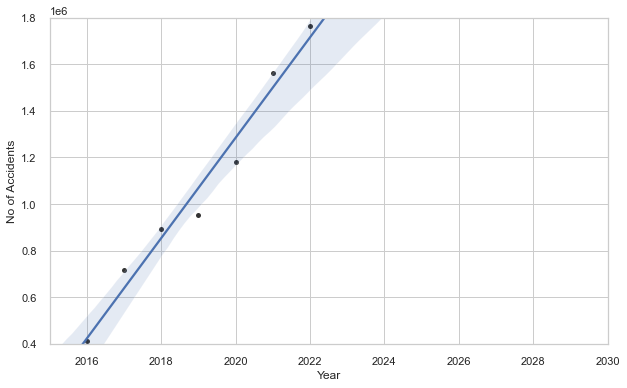

In [78]:
#Plotting the regression line with seaborn 

fig =plt.figure(figsize =(10,6))

sns.set_style('whitegrid')
plt.xlim(2015, 2030)
plt.ylim(400000, 1800000)
#sns.regplot(data =df_data, x = 'Date', y = 'Close',scatter = False)
sns.regplot(data =df_year_sub, x = 'Year', y = 'No of Accidents', truncate = False, scatter_kws = {'s' :25, 'color' : 'black'})
plt.show()

### Natural Language Processing

In [79]:
#REDUCE ROW SIZE FOR easy coding
df_sub = df.iloc[1:100000]

In [80]:
import nltk
from textblob import TextBlob

# create a df for the description of the accident
df_des = df_sub['Description'].to_frame()
df_des

,Description
1,Accident on Brice Rd at Tussing Rd. Expect del...
2,Accident on OH-32 State Route 32 Westbound at ...
3,Accident on I-75 Southbound at Exits 52 52B US...
4,Accident on McEwen Rd at OH-725 Miamisburg Cen...
5,Accident on I-270 Outerbelt Northbound near Ex...
...,...
99995,Right hand shoulder blocked due to accident on...
99996,Two lanes blocked and queueing traffic due to ...
99997,Accident on Day Creek Blvd near Baseline Rd.
99998,Lane blocked on exit ramp due to accident moto...


In [81]:
total_polarity = 0
total_subjectivity = 0
total_entries = len(df_des['Description'])

for index, row in df_des.iterrows():
    t = TextBlob(row['Description'])
    total_polarity = total_polarity + t.sentiment.polarity
    total_subjectivity = total_subjectivity + t.sentiment.subjectivity 

avg_polarity = total_polarity/total_entries
avg_subjectivity = total_subjectivity/total_entries


print(avg_polarity)
print(avg_subjectivity)

-0.004851219424613812
0.22844824393138918
